# **Problem Statement**


**In the competitive landscape of the logistics and supply chain industry, timely and efficient delivery is critical for customer satisfaction and operational success. FedEx, as a leading global logistics provider, must continuously monitor and optimize its logistics performance to meet customer expectations, reduce costs, and improve service reliability.**

#### **Define Your Business Objective?**

1. **Performance Metrics Evaluation:** Analyze key performance indicators (KPIs) related to delivery times, shipment accuracy, and customer satisfaction. This includes assessing metrics such as on-time delivery rates, average transit times, and the incidence of lost or damaged packages.

2. **Root Cause Analysis:** Identify factors contributing to delays and inefficiencies in the logistics process. This may involve examining internal processes, external conditions (such as weather and traffic), and vendor performance.

3. **Cost Analysis:** Assess the cost implications of logistics operations, including transportation costs, warehousing expenses, and labor costs. Understanding these financial aspects will help in identifying areas for cost reduction without compromising service quality.

4. **Customer Feedback Assessment:** Analyze customer feedback and complaints related to delivery performance. Understanding customer sentiments and experiences can highlight areas needing improvement.

5. **Operational Efficiency:** Evaluate the efficiency of logistics operations by analyzing route optimization, load management, and resource allocation. This will involve identifying opportunities for process improvement and technological enhancements.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
path = r"/content/drive/MyDrive/Colab Notebooks/SCMS_Delivery_History_Dataset.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Number of rows in the dataset are:",df.shape[0])
print("Number of columns in the dataset are:",df.shape[1])

Number of rows in the dataset are: 10324
Number of columns in the dataset are: 33


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [ ]:

# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

,0
Dosage,1736
Shipment Mode,360
Line Item Insurance (USD),287
Molecule/Test Type,0
Brand,0
Dosage Form,0
Unit of Measure (Per Pack),0
Line Item Quantity,0
Line Item Value,0
Vendor,0


<Axes: >

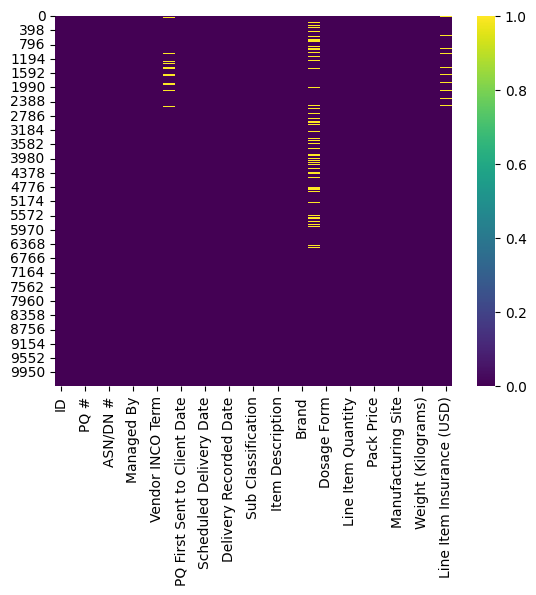

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cmap ='viridis',)

### What did you know about your dataset?

**We are working with a dataset containing 10,324 rows and 33 columns. Upon initial inspection, we identified several columns with missing values: the 'Shipment Mode' column has 360 null values, the 'Dosage' column contains 1,736 null values, and the 'Line Item Insurance' column has 287 null values.**

**To better understand the distribution of missing data, we utilized the Seaborn library to create a heatmap, providing a visual representation of where these null values occur. Our first step involved loading the dataset and exploring its structure, including the various columns and the type of data they hold. This initial analysis helped us grasp the scope and characteristics of the data, allowing us to proceed with further investigation.**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.apply(lambda x:x.unique())

,0
ID,"[1, 3, 4, 15, 16, 23, 44, 45, 46, 47, 60, 61, ..."
Project Code,"[100-CI-T01, 108-VN-T01, 112-NG-T01, 110-ZM-T0..."
PQ #,"[Pre-PQ Process, FPQ-4587, FPQ-12051, FPQ-1482..."
PO / SO #,"[SCMS-4, SCMS-13, SCMS-20, SCMS-78, SCMS-81, S..."
ASN/DN #,"[ASN-8, ASN-85, ASN-14, ASN-50, ASN-55, ASN-57..."
Country,"[Côte d'Ivoire, Vietnam, Nigeria, Zambia, Tanz..."
Managed By,"[PMO - US, South Africa Field Office, Haiti Fi..."
Fulfill Via,"[Direct Drop, From RDC]"
Vendor INCO Term,"[EXW, FCA, DDU, CIP, DDP, CIF, N/A - From RDC,..."
Shipment Mode,"[Air, nan, Truck, Air Charter, Ocean]"



## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.isnull().sum().sort_values(ascending=False)

,0
Dosage,1736
Shipment Mode,360
Line Item Insurance (USD),287
Molecule/Test Type,0
Brand,0
Dosage Form,0
Unit of Measure (Per Pack),0
Line Item Quantity,0
Line Item Value,0
Vendor,0


In [ ]:
# We have fill the null values with the imputation method by using mode
mode_dosage = df['Dosage'].mode()[0]
df['Dosage'].fillna(mode_dosage, inplace=True)

<ipython-input-15-56b28326e144>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dosage'].fillna(mode_dosage, inplace=True)


In [ ]:
df['Dosage'].nunique()

54

In [ ]:
df['Dosage'].isnull().sum()

0

In [ ]:
df['Shipment Mode'].unique()

array(['Air', nan, 'Truck', 'Air Charter', 'Ocean'], dtype=object)

In [ ]:
df['Shipment Mode'].value_counts()

,count
Shipment Mode,
Air,6113
Truck,2830
Air Charter,650
Ocean,371


In [ ]:
# Replace 'Date Not Captured' with NaN
df['PO Sent to Vendor Date'].replace('Date Not Captured', pd.NA, inplace=True)

# Fill the NaN values with the previous value using forward fill
df['PO Sent to Vendor Date'].ffill(inplace=True)

# Display the modified column
df['PO Sent to Vendor Date']


<ipython-input-20-cd769c0ed652>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PO Sent to Vendor Date'].replace('Date Not Captured', pd.NA, inplace=True)
<ipython-input-20-cd769c0ed652>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

,PO Sent to Vendor Date
0,<NA>
1,<NA>
2,<NA>
3,<NA>
4,<NA>
...,...
10319,N/A - From RDC
10320,N/A - From RDC
10321,N/A - From RDC
10322,N/A - From RDC


In [ ]:
df['PO Sent to Vendor Date'].replace('N/A - From RDC', pd.NaT, inplace=True)

# Convert the column to datetime (if it's not already in datetime format)
df['PO Sent to Vendor Date'] = pd.to_datetime(df['PO Sent to Vendor Date'])

# Instead of inplace=True, directly assign the result back:
df['PO Sent to Vendor Date'] = df['PO Sent to Vendor Date'].interpolate(method='linear')

<ipython-input-31-86cbe692a9cb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PO Sent to Vendor Date'].replace('N/A - From RDC', pd.NaT, inplace=True)


In [ ]:
#Null values in the dataset are filled with the help of forward filling method
df['Shipment Mode'].ffill(inplace=True)
df['Shipment Mode']

<ipython-input-32-5be6bdc41f43>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Shipment Mode'].ffill(inplace=True)


,Shipment Mode
16,Air
19,Air
21,Air
22,Air
23,Air
...,...
10319,Truck
10320,Truck
10321,Truck
10322,Truck


In [ ]:
df['Line Item Insurance (USD)']

,Line Item Insurance (USD)
16,192.00
19,128.00
21,224.93
22,3.07
23,65.75
...,...
10319,705.79
10320,161.71
10321,5284.04
10322,134.03


In [ ]:
# As there are only 287 null values in the column of of 10324 we can drop the values as there is only 2% of data loss
df.dropna(subset=['Line Item Insurance (USD)'], inplace=True)

In [ ]:
df['Line Item Insurance (USD)'].isnull().sum()

0

In [ ]:
#Stores the operation and data cleaning into new file
df.to_csv('FEDX logistic Performance file.csv', index=False)

In [ ]:
 df1 = pd.read_csv('/content/FEDX logistic Performance data cleaning file.csv')

In [ ]:
df1.shape

(10037, 33)

### What all manipulations have you done and insights you found?

**Manipulations Performed:**

1. Dropping Null Values in 'Line Item Insurance (USD)':
   - Action: The null values in the 'Line Item Insurance (USD)' column were dropped.
   - Reason: Since only 287 out of 10,324 entries were null, accounting for only about 2% of the total data, dropping them was deemed acceptable to prevent significant data loss.
2. Forward Filling Missing Values in 'Shipment Mode':
   - Action: The missing values in the 'Shipment Mode' column were filled using the forward filling method.
   - Reason: Forward filling uses the last available valid observation to fill gaps, which is suitable for sequential data where the previous mode can reasonably carry forward.
3. Imputing Missing Values in 'Dosage' Using Mode:
   - Action: The null values in the 'Dosage' column were filled with the mode (the most frequent value).
   - Reason: Imputation with mode is an effective method for categorical or frequently occurring values. Since dosage information may have a dominant standard value, using the mode preserves the data's integrity.
4. Saving the Cleaned Data:
   - Action: After cleaning, the dataset was saved into a new CSV file named 'FEDX logistic Performance data cleaning file.csv'.
   - Purpose: Storing the cleaned dataset allows for further analysis with all missing values handled and inconsistencies resolved.

**Insights Derived from the Manipulation:**

1. Minimized Data Loss:
    - Dropping 287 records in the 'Line Item Insurance (USD)' column only caused a 2% data loss, which is negligible given the dataset size of over 10,000 records. This ensures that analysis is still robust and meaningful.

2. Handling Missing Shipment Modes:
    - By forward filling missing values in the 'Shipment Mode' column, the continuity of shipping-related data was maintained. This method is effective when shipment patterns are sequential, preventing any skew in analysis due to gaps in data.
3. Standardizing Dosage Data:
    - Using the mode to fill null values in the 'Dosage' column helped maintain consistency, especially if there are dominant dosage values. This ensures no misrepresentation due to missing data while retaining the most likely dosage information.
4. Data Quality Improved:
    - The dataset is now free of missing values, making it more suitable for further analysis, such as predicting performance, costs, or shipment delays. Clean data helps in building more accurate models and deriving better insights.
5. Ready for Advanced Analysis:
    - With missing values handled, this cleaned dataset can be used for advanced analyses such as logistic performance evaluation, delivery time analysis, or cost optimization in shipping. It is also suitable for visualizations, dashboards, or statistical modeling.